# Vilar Oscillator
***
**From:** Vilar, José M. G. et al. “Mechanisms of noise-resistance in genetic oscillators.” PNAS, vol. 99 no. 9, 2002, pp. 5988-5992., doi.org/10.1073/pnas.092133899.
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../GillesPy2/')))

In [19]:
import gillespy2
import time

In [33]:
from matplotlib import pyplot as plt

***
## Create the Vilar Oscillator Model
***
Model must include rates, species, and reactions

In [4]:
def create_vilar_oscillator(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="VilarOscillator")
    
    # Set System Volume
    model.volume = 1

    # Define Variables (GillesPy2.Species)
    Da = gillespy2.Species(name="Da", initial_value=1, mode="discrete")
    Da_prime = gillespy2.Species(name="Da_prime", initial_value=0, mode="discrete")
    Ma = gillespy2.Species(name="Ma", initial_value=0, mode="discrete")
    Dr = gillespy2.Species(name="Dr", initial_value=1, mode="discrete")
    Dr_prime = gillespy2.Species(name="Dr_prime", initial_value=0, mode="discrete")
    Mr = gillespy2.Species(name="Mr", initial_value=0, mode="discrete")
    C = gillespy2.Species(name="C", initial_value=0, mode="discrete")
    A = gillespy2.Species(name="A", initial_value=0, mode="discrete")
    R = gillespy2.Species(name="R", initial_value=0, mode="discrete")

    # Add Variables to Model
    model.add_species([Da, Da_prime, Ma, Dr, Dr_prime, Mr, C, A, R])

    # Define Parameters
    alphaA = gillespy2.Parameter(name="alphaA", expression=50)
    alphaA_prime = gillespy2.Parameter(name="alphaA_prime", expression=500)
    alphaR = gillespy2.Parameter(name="alphaR", expression=0.01)
    alphaR_prime = gillespy2.Parameter(name="alphaR_prime", expression=50)
    betaA = gillespy2.Parameter(name="betaA", expression=50)
    betaR = gillespy2.Parameter(name="betaR", expression=5)
    deltaMA = gillespy2.Parameter(name="deltaMA", expression=10)
    deltaMR = gillespy2.Parameter(name="deltaMR", expression=0.5)
    deltaA = gillespy2.Parameter(name="deltaA", expression=1)
    deltaR = gillespy2.Parameter(name="deltaR", expression=0.2)
    gammaA = gillespy2.Parameter(name="gammaA", expression=1)
    gammaR = gillespy2.Parameter(name="gammaR", expression=1)
    gammaC = gillespy2.Parameter(name="gammaC", expression=2)
    thetaA = gillespy2.Parameter(name="thetaA", expression=50)
    thetaR = gillespy2.Parameter(name="thetaR", expression=100)

    # Add Parameters to Model
    model.add_parameter([
        alphaA, alphaA_prime, alphaR, alphaR_prime, betaA, betaR, deltaMA,
        deltaMR, deltaA, deltaR, gammaA, gammaR, gammaC, thetaA, thetaR
    ])

    # Define Reactions
    r1 = gillespy2.Reaction(name="r1", reactants={'A': 1, 'R': 1}, products={'C': 1}, rate="gammaC")
    r2 = gillespy2.Reaction(name="r2", reactants={'A': 1}, products={}, rate="deltaA")
    r3 = gillespy2.Reaction(name="r3", reactants={'C': 1}, products={'R': 1}, rate="deltaA")
    r4 = gillespy2.Reaction(name="r4", reactants={'R': 1}, products={}, rate="deltaR")
    r5 = gillespy2.Reaction(name="r5", reactants={'A': 1, 'Da': 1}, products={'Da_prime': 1}, rate="gammaA")
    r6 = gillespy2.Reaction(name="r6", reactants={'Da_prime': 1}, products={'A': 1, 'Da': 1}, rate="thetaA")
    r7 = gillespy2.Reaction(name="r7", reactants={'Da': 1}, products={'Da': 1, 'Ma': 1}, rate="alphaA")
    r8 = gillespy2.Reaction(
        name="r8", reactants={'Da_prime': 1}, products={'Da_prime': 1, 'Ma': 1}, rate="alphaA_prime"
    )
    r9 = gillespy2.Reaction(name="r9", reactants={'Ma': 1}, products={}, rate="deltaMA")
    r10 = gillespy2.Reaction(name="r10", reactants={'Ma': 1}, products={'A': 1, 'Ma': 1}, rate="betaA")
    r11 = gillespy2.Reaction(name="r11", reactants={'A': 1, 'Dr': 1}, products={'Dr_prime': 1}, rate="gammaR")
    r12 = gillespy2.Reaction(name="r12", reactants={'Dr_prime': 1}, products={'A': 1, 'Dr': 1}, rate="thetaR")
    r13 = gillespy2.Reaction(name="r13", reactants={'Dr': 1}, products={'Dr': 1, 'Mr': 1}, rate="alphaR")
    r14 = gillespy2.Reaction(
        name="r14", reactants={'Dr_prime': 1}, products={'Dr_prime': 1, 'Mr': 1}, rate="alphaR_prime"
    )
    r15 = gillespy2.Reaction(name="r15", reactants={'Mr': 1}, products={}, rate="deltaMR")
    r16 = gillespy2.Reaction(name="r16", reactants={'Mr': 1}, products={'Mr': 1, 'R': 1}, rate="betaR")

    # Add Reactions to Model
    model.add_reaction([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14, r15, r16])

    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=200, num_points=201)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [5]:
%time model = create_vilar_oscillator()

CPU times: user 3.15 ms, sys: 0 ns, total: 3.15 ms
Wall time: 3.1 ms


***
## Run the Simulations
***
Run the model by calling the run function on the model and select algorithm via 'algorithm' keyword argument.
### ODE Simulation

In [6]:
%time ode_results = model.run(algorithm="ODE")

CPU times: user 8.72 ms, sys: 8.24 ms, total: 17 ms
Wall time: 6.67 s


### SSA Simulation

In [7]:
%time ssa_results = model.run(algorithm="SSA")

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 3.24 s


### Tau Leaping Simulation

In [8]:
%time tau_results = model.run(algorithm="Tau-Leaping")

CPU times: user 13.6 ms, sys: 8.24 ms, total: 21.8 ms
Wall time: 6.91 s


### Tau Hybrid Simulation

In [9]:
%time hybrid_results = model.run(algorithm="Tau-Hybrid")

CPU times: user 18.7 ms, sys: 5.13 ms, total: 23.8 ms
Wall time: 12.1 s


***
## Visualizations
***

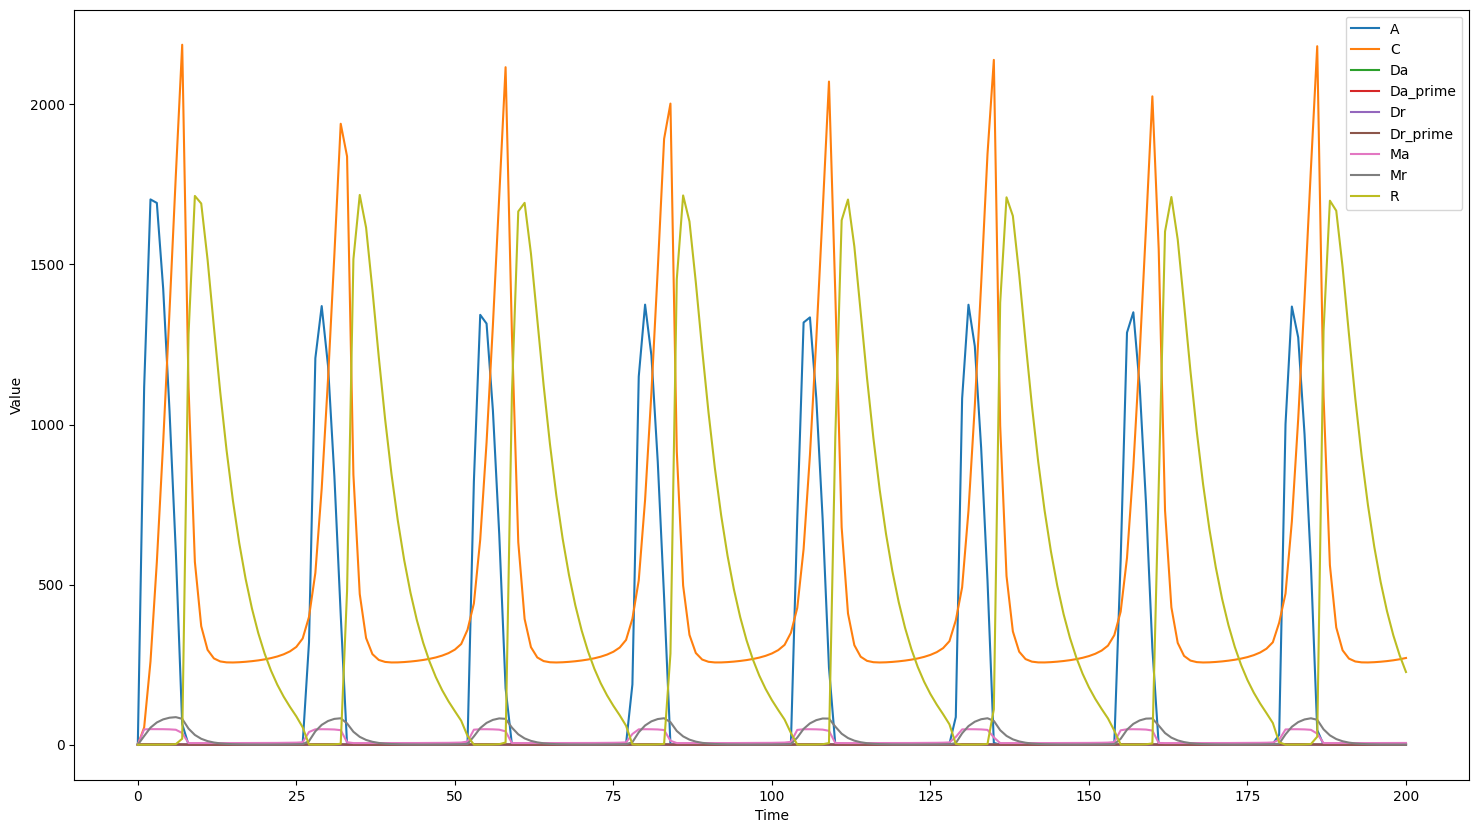

In [10]:
ode_results.plot()

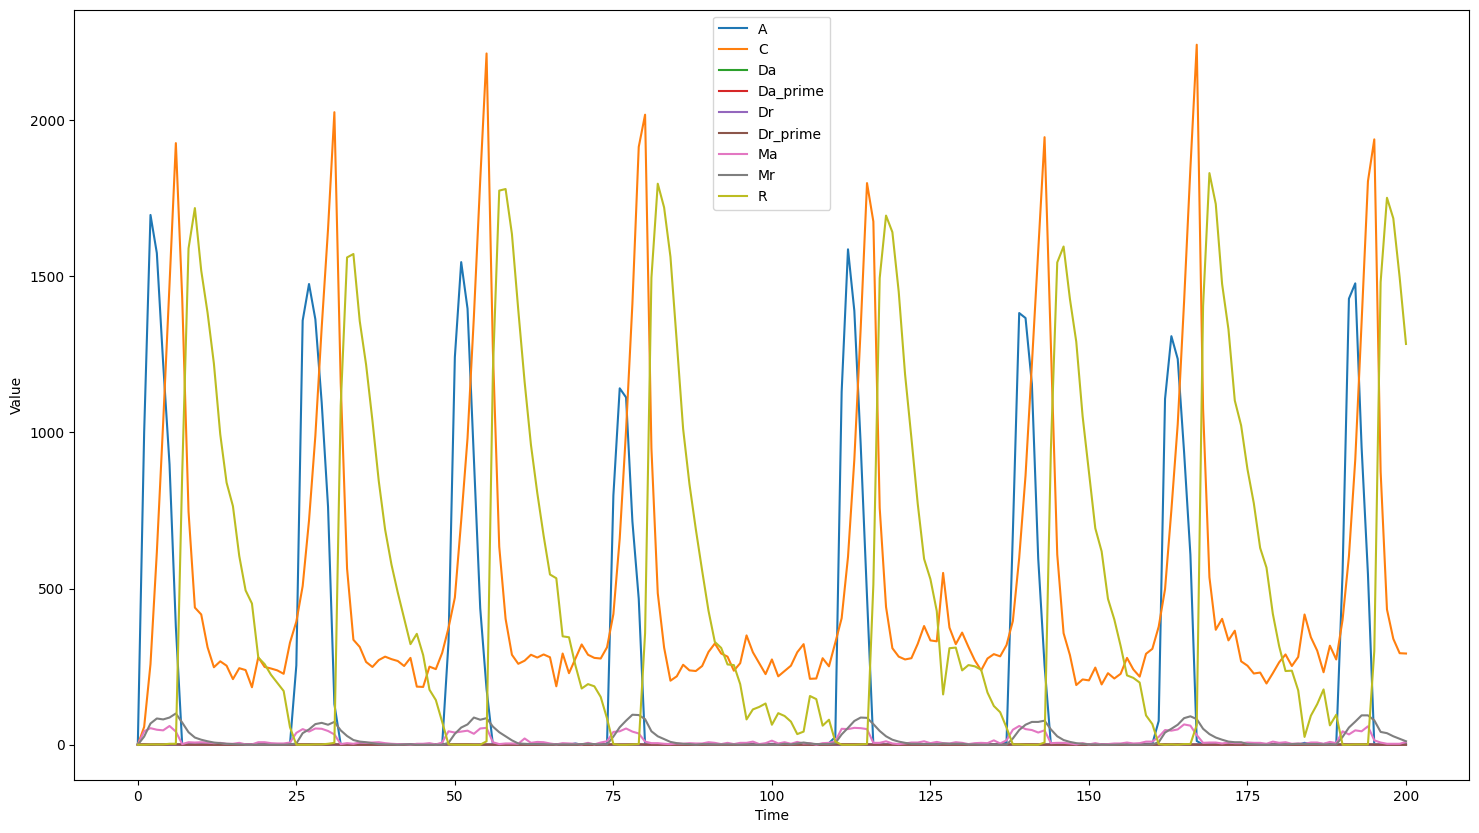

In [11]:
ssa_results.plot()

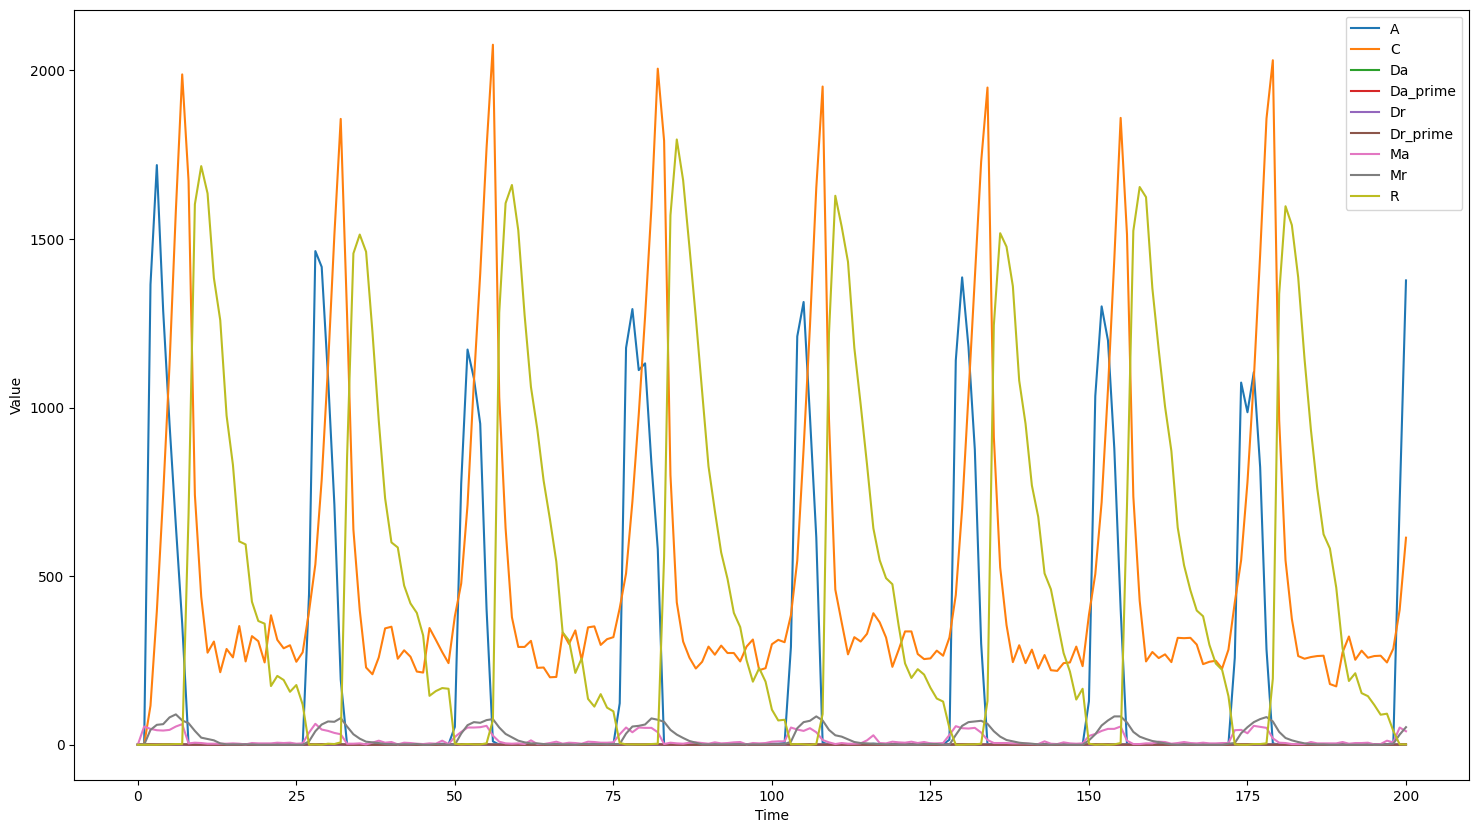

In [12]:
tau_results.plot()

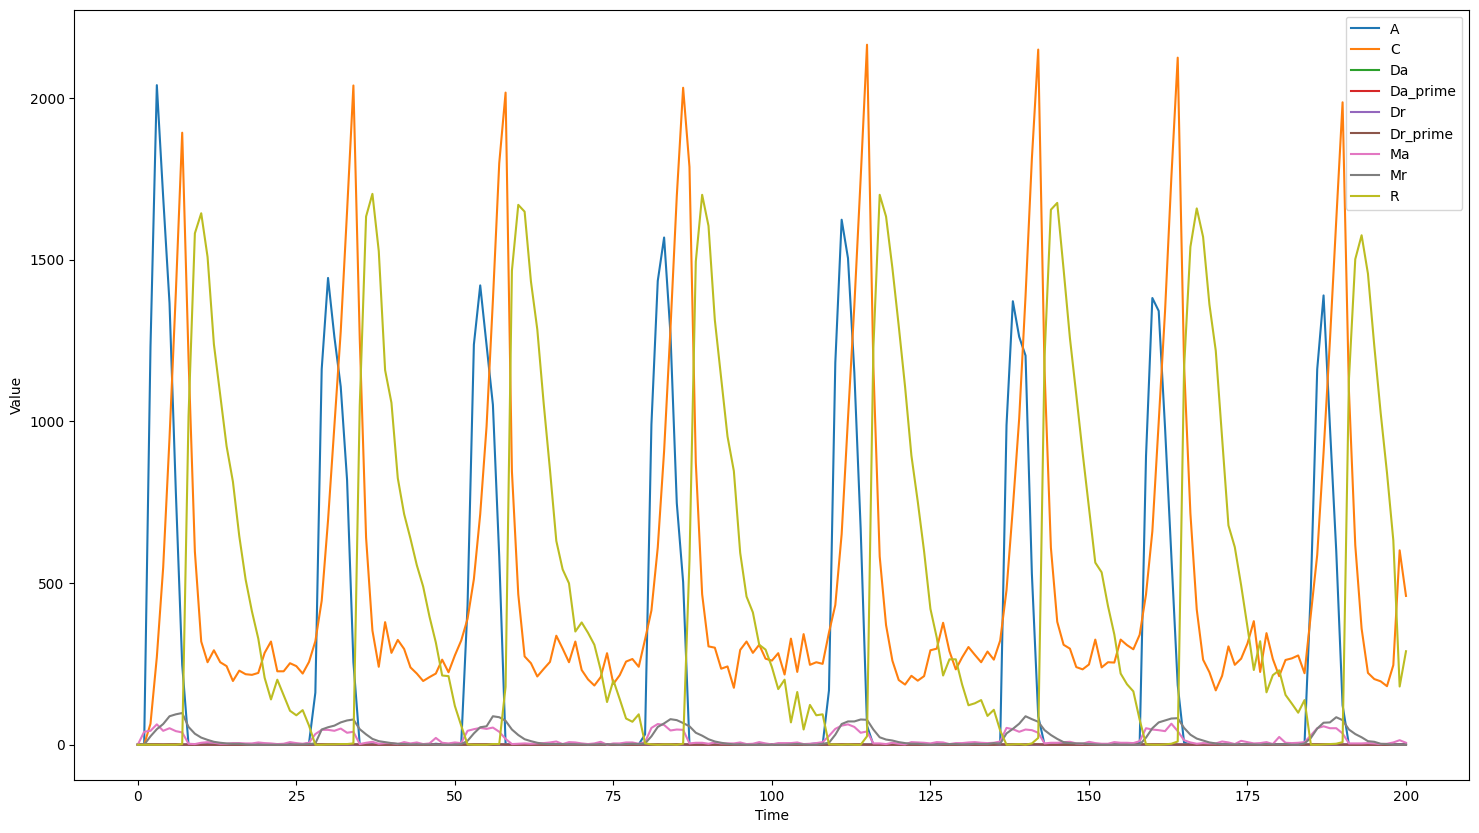

In [13]:
hybrid_results.plot()

In [106]:
all_solvers = {
 #'CLESolver': gillespy2.solvers.numpy.CLE_solver.CLESolver,
 'NumPySSASolver': gillespy2.solvers.numpy.ssa_solver.NumPySSASolver,
 'ODECSolver': gillespy2.solvers.cpp.ode_c_solver.ODECSolver,
 'ODESolver': gillespy2.solvers.numpy.ode_solver.ODESolver,
 'SSACSolver': gillespy2.solvers.cpp.ssa_c_solver.SSACSolver,
 'TauHybridCSolver': gillespy2.solvers.cpp.tau_hybrid_c_solver.TauHybridCSolver,
 #'TauHybridSolver': gillespy2.solvers.numpy.tau_hybrid_solver.TauHybridSolver,
 'TauLeapingCSolver': gillespy2.solvers.cpp.tau_leaping_c_solver.TauLeapingCSolver,
 'TauLeapingSolver': gillespy2.solvers.numpy.tau_leaping_solver.TauLeapingSolver,
}


In [15]:
def time_solver(solver,number_of_trajectories=1):
    t1 = time.perf_counter()
    mode = create_vilar_oscillator()
    t2 = time.perf_counter()
    sol = solver(model=model)
    t3 = time.perf_counter()
    res = sol.run(number_of_trajectories=number_of_trajectories)
    t4 = time.perf_counter()
    model_time = t2-t1
    compile_time = t3-t2
    run_time = t4-t3
    return (model_time,compile_time,run_time)
    

In [20]:
time_solver(all_solvers['ODESolver'])

/usr/lib/python3/dist-packages/scipy/integrate/_ode.py:1347: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


(0.008778158997301944, 0.0014513589994749054, 0.7214196239947341)

In [23]:
for sname,sclass in all_solvers.items():
    print(f"{sname}: ",end='')
    (mt,ct,rt) = time_solver(sclass)
    print(f"{mt} {ct} {rt}")

ODESolver: 0.011462135007604957 0.002796242988551967 0.6995557300106157
SSACSolver: 0.00252274599915836 3.0029668460047105 0.07878195100056473
TauHybridCSolver: 0.0029733150004176423 11.047361655000714 1.3626052670006175
TauLeapingCSolver: 0.0026671270024962723 5.321260362004978 1.5794164370017825
TauLeapingSolver: 0.0027125180058646947 0.0007917509938124567 29.16074502900301


In [16]:
v_num_traj = [1e0, 1e1, 1e2, 1e3,]
timing_data = {}

In [ ]:
for sname,sclass in all_solvers.items():
    print(f"{sname}: ",end='')
    if sname in timing_data:
        print(f"skipping {sname}")
        continue
    timing_data[sname] = {'mt':[], 'ct':[], 'rt':[]}
    for v_num in v_num_traj:
        print(f"{v_num} ",end='')
        (mt,ct,rt) = time_solver(sclass, number_of_trajectories=int(v_num))
        timing_data[sname]['mt'].append(mt)
        timing_data[sname]['ct'].append(ct)
        timing_data[sname]['rt'].append(rt)
    print()
    break

NumPySSASolver: 1.0 10.0 100.0 

In [104]:
timing_data

{'ODESolver': {'mt': [0.008135053009027615,
   0.002601307991426438,
   0.0024439759872620925,
   0.002352957002585754],
  'ct': [0.005327806997229345,
   0.0007346160127781332,
   0.0007756480044918135,
   0.0007319199939956889],
  'rt': [0.6836650469922461,
   0.678447297992534,
   0.6918913900008192,
   0.6810719409986632]},
 'SSACSolver': {'mt': [0.004509607999352738,
   0.0026580350095173344,
   0.0027326560084475204,
   0.002919210004620254],
  'ct': [2.920141940994654,
   2.879773316992214,
   2.8839452899992466,
   2.810304332000669],
  'rt': [0.07868387800408527,
   0.6354037040000549,
   6.335144216995104,
   69.30508759600343]},
 'TauHybridCSolver': {'mt': [0.0040096260054269806,
   0.0026505319983698428,
   0.0029091420001350343,
   0.0028389039944158867],
  'ct': [11.784797839995008,
   11.218686616994091,
   12.014192963993992,
   11.247429743001703],
  'rt': [1.2852603149949573,
   14.65219504700508,
   148.71072442500736,
   1546.290681308994]},
 'TauLeapingCSolver': {'

In [67]:
import numpy

In [76]:
?numpy.sum

In [79]:
numpy.sum([ timing_data['ODESolver'][k] for k in timing_data['ODESolver'].keys() ],axis=0)

array([0.69712791, 0.68178322, 0.69511101, 0.68415682])

In [99]:
def plot_timing_data(sname, keys=None):
    ky = keys
    key_lookup = {'tt':'Total Time','mt':"Model Time",'ct':"Compile Time",'rt':"Run Time"}
    if ky is None:
        ky = key_lookup.keys()
    for k in ky:
        if k=='tt':
            d = numpy.sum([ timing_data[sname][k] for k in timing_data[sname].keys() ],axis=0)
            plt.loglog(v_num_traj, d, label=f"{sname}")
        else:
            #plt.plot(v_num_traj, timing_data[sname][k], label=f"{sname}-{k}")
            plt.loglog(v_num_traj, timing_data[sname][k], label=f"{sname}")
    if len(ky)==1:
        plt.title(key_lookup[k])
    plt.legend(loc='best')
    plt.xlabel('Number of Trajectories')
    plt.ylabel('Time (s)')

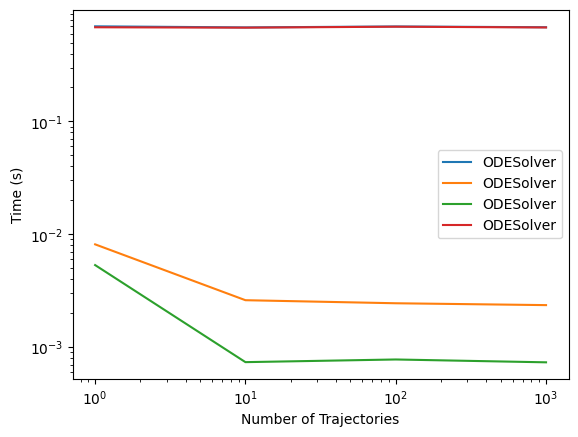

In [100]:
plot_timing_data('ODESolver')

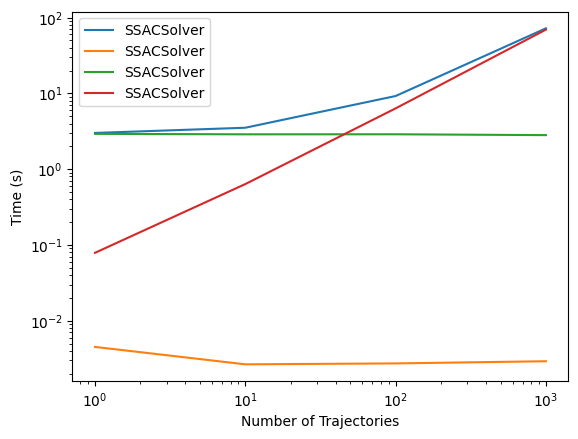

In [101]:
plot_timing_data('SSACSolver')

In [ ]:
for k in timing_data.keys():
    plot_timing_data(k)

In [ ]:
for ky in ['mt','ct','rt','tt']:
    plt.figure()
    for k in timing_data.keys():
        plot_timing_data(k,[ky])